In [22]:
import pandas
import numpy
data = pandas.read_csv("1976-2020-president.csv")
data.head()


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER


Urči pořadí jednotlivých kandidátů v jednotlivých státech a v jednotlivých letech (pomocí metody rank()). Nezapomeň, že data je před použitím metody nutné seřadit a spolu s metodou rank() je nutné použít metodu groupby().

In [23]:

data["rank"] = data.groupby(["state","year"])["candidatevotes"].rank(ascending=False)
data = data.sort_values(["state", "year"])
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,2.0
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER,3.0
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER,4.0
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER,5.0


Pro další analýzu jsou důležití pouze vítězové. Vytvoř novou tabulku, která bude obsahovat pouze vítěze voleb

In [24]:
data = data[data["rank"] == 1]
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0


Pomocí metody shift() přidej nový sloupec, abys v jednotlivých řádcích měl(a) po sobě vítězné strany ve dvou po sobě jdoucích letech.

In [25]:
#data = data.sort_values(["state","year"])
data["previous_winner_party"] = data.groupby("state")["party_simplified"].shift(periods=1)
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_winner_party
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,NaN
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN


Porovnej, jestli se ve dvou po sobě jdoucích letech změnila vítězná strana. Můžeš k tomu použít např. funkci numpy.where() nebo metodu apply().

In [26]:
def party(row):
    if pandas.isnull(row["previous_winner_party"]) or row["party_simplified"] == row["previous_winner_party"]  :
        point = 0
    else:
        point = 1
    return point
data["change"] = data.apply(party, axis=1)
data.to_csv("data_1.csv") 
data.head()




,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_winner_party,change
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,NaN,0
332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1
696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0


Proveď agregaci podle názvu státu a seřaď státy podle počtu změn vítězných stran. Abyste totiž mohli data sařadit, je nutné tabulku vytvořenou metodou groupby převést na klasickou tabulku. Použitím metody groupby vám totiž vznikne "groupovaná tabulka", která nejde řadit.

In [27]:
data_pivot = data.groupby(["state"])["change"].sum()
data_pivot = pandas.DataFrame(data_pivot)
data_pivot = data_pivot.sort_values("change",ascending=False)
data_pivot.head(15)

,change
state,
OHIO,5
FLORIDA,5
GEORGIA,4
WISCONSIN,4
IOWA,4
PENNSYLVANIA,4
NEVADA,3
TENNESSEE,3
LOUISIANA,3


Vytvoř sloupcový graf s 10 státy, kde došlo k nejčastější změně vítězné strany. Jako výšku sloupce nastav počet změn.

Text(0, 0.5, 'change')

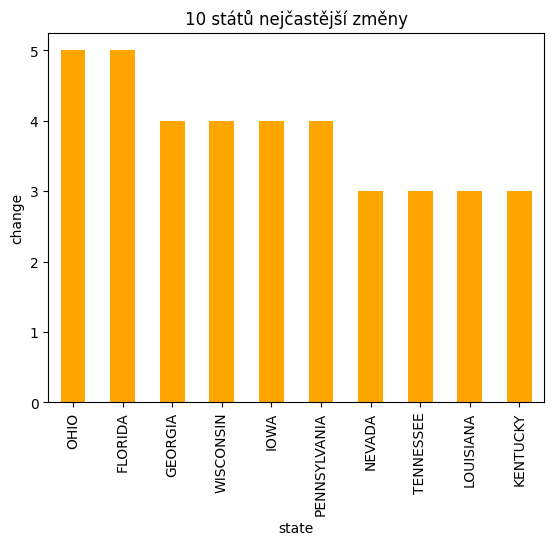

In [28]:
import matplotlib.pyplot as plt
gf = data_pivot["change"][:10].plot(kind="bar", color="orange",title="10 států nejčastější změny")
plt.xlabel("state")
plt.ylabel("change")

In [29]:
data = pandas.read_csv("1976-2020-president.csv")
#data.head()
data["rank"] = data.groupby(["state","year"])["candidatevotes"].rank(ascending=False)

data.head()


,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0
1,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,504070,1182850,20210113,NaN,REPUBLICAN,2.0
2,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"MADDOX, LESTER",AMERICAN INDEPENDENT PARTY,False,9198,1182850,20210113,NaN,OTHER,3.0
3,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"BUBAR, BENJAMIN """"BEN""""",PROHIBITION,False,6669,1182850,20210113,NaN,OTHER,4.0
4,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"HALL, GUS",COMMUNIST PARTY USE,False,1954,1182850,20210113,NaN,OTHER,5.0


Přidej do tabulky sloupec, který obsahuje absolutní rozdíl mezi vítězem a druhým v pořadí.

In [30]:
data["second_candidate"] = data.groupby(["state","year"])["candidatevotes"].shift(periods=-1)
data["margin"] = data["candidatevotes"] - data["second_candidate"]
data = data[data["rank"] == 1]
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,second_candidate,margin
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,504070.0,155100.0
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0,44058.0,27497.0
11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0,295602.0,123040.0
19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,1.0,267903.0,230701.0
23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0,3742284.0,139960.0


Přidej sloupec s relativním marginem, tj. rozdílem vyděleným počtem hlasů.

In [31]:
data["relative_margine"]= data["margin"] / data["totalvotes"]
data.head()

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,second_candidate,margin,relative_margine
0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,504070.0,155100.0,0.131124
7,1976,ALASKA,AK,2,94,81,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,71555,123574,20210113,NaN,REPUBLICAN,1.0,44058.0,27497.0,0.222514
11,1976,ARIZONA,AZ,4,86,61,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,418642,742719,20210113,NaN,REPUBLICAN,1.0,295602.0,123040.0,0.165662
19,1976,ARKANSAS,AR,5,71,42,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,498604,767535,20210113,NaN,DEMOCRAT,1.0,267903.0,230701.0,0.300574
23,1976,CALIFORNIA,CA,6,93,71,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,3882244,7803770,20210113,NaN,REPUBLICAN,1.0,3742284.0,139960.0,0.017935


Seřaď tabulku podle velikosti relativního marginu a zjisti, kdy a ve kterém státě byl výsledek voleb nejtěsnější.


In [32]:
data.sort_values("relative_margine")

,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,second_candidate,margin,relative_margine
2106,2000,FLORIDA,FL,12,59,43,US PRESIDENT,"BUSH, GEORGE W.",REPUBLICAN,False,2912790,5963110,20210113,NaN,REPUBLICAN,1.0,2912253.0,537.0,0.000090
2266,2000,NEW MEXICO,NM,35,85,66,US PRESIDENT,"GORE, AL",DEMOCRAT,False,286783,598605,20210113,NaN,DEMOCRAT,1.0,286417.0,366.0,0.000611
2907,2008,MISSOURI,MO,29,43,34,US PRESIDENT,"MCCAIN, JOHN",REPUBLICAN,False,1445814,2925205,20210113,NaN,REPUBLICAN,1.0,1441911.0,3903.0,0.001334
479,1980,MASSACHUSETTS,MA,25,14,3,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,1057631,2524090,20210113,NaN,REPUBLICAN,1.0,1053802.0,3829.0,0.001517
241,1976,OREGON,OR,41,92,72,US PRESIDENT,"FORD, GERALD",REPUBLICAN,False,492120,1029876,20210113,NaN,REPUBLICAN,1.0,490407.0,1713.0,0.001663
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2465,2004,DISTRICT OF COLUMBIA,DC,11,53,55,US PRESIDENT,"KERRY, JOHN",DEMOCRAT,False,202970,227586,20210113,NaN,DEMOCRAT,1.0,21256.0,181714.0,0.798441
3130,2012,DISTRICT OF COLUMBIA,DC,11,53,55,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,267070,293764,20210113,NaN,DEMOCRAT,1.0,21381.0,245689.0,0.836348
2785,2008,DISTRICT OF COLUMBIA,DC,11,53,55,US PRESIDENT,"OBAMA, BARACK H.",DEMOCRAT,False,245800,265853,20210113,NaN,DEMOCRAT,1.0,17367.0,228433.0,0.859246
3460,2016,DISTRICT OF COLUMBIA,DC,11,53,55,US PRESIDENT,"CLINTON, HILLARY",DEMOCRAT,False,282830,312575,20210113,NaN,DEMOCRAT,1.0,12723.0,270107.0,0.864135


Vytvoř pivot tabulku, která zobrazí pro jednotlivé volební roky, kolik států přešlo od Republikánské strany k Demokratické straně, kolik států přešlo od Demokratické strany k Republikánské straně a kolik států volilo kandidáta stejné strany.

In [33]:
data_next = pandas.read_csv("data_1.csv")
data_next.head()

,Unnamed: 0,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_winner_party,change
0,0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,NaN,0
1,332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1
2,696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
3,1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0
4,1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0


In [36]:
def lep(row):
    if pandas.isnull(row["previous_winner_party"]): 
        return "no swing"
    elif (row["party_simplified"] == "REPUBLICAN") & (row["previous_winner_party"] == "DEMOCRAT"):
        return "to Rep."
    elif (row["party_simplified"] == "DEMOCRAT") & (row["previous_winner_party"] == "REPUBLICAN"):
        return "to Dem." 
    else:
        return "no swing"
         
data_next["swing"] = data_next.apply(lep, axis=1)
data_next.head()

,Unnamed: 0,year,state,state_po,state_fips,state_cen,state_ic,office,candidate,party_detailed,writein,candidatevotes,totalvotes,version,notes,party_simplified,rank,previous_winner_party,change,swing
0,0,1976,ALABAMA,AL,1,63,41,US PRESIDENT,"CARTER, JIMMY",DEMOCRAT,False,659170,1182850,20210113,NaN,DEMOCRAT,1.0,NaN,0,no swing
1,332,1980,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,654192,1341929,20210113,NaN,REPUBLICAN,1.0,DEMOCRAT,1,to Rep.
2,696,1984,ALABAMA,AL,1,63,41,US PRESIDENT,"REAGAN, RONALD",REPUBLICAN,False,872849,1441713,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
3,1019,1988,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,815576,1378476,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing
4,1304,1992,ALABAMA,AL,1,63,41,US PRESIDENT,"BUSH, GEORGE H.W.",REPUBLICAN,False,804283,1688060,20210113,NaN,REPUBLICAN,1.0,REPUBLICAN,0,no swing


In [35]:
data_next_pivot = pandas.pivot_table(data=data_next, index= "year", columns= ["swing"], values= "state", aggfunc=len)
data_next_pivot

swing,no swing,to Dem.,to Rep.
year,,,
1976,51.0,NaN,NaN
1980,35.0,NaN,16.0
1984,45.0,NaN,6.0
1988,42.0,9.0,NaN
1992,29.0,22.0,NaN
1996,46.0,2.0,3.0
2000,40.0,NaN,11.0
2004,48.0,1.0,2.0
2008,42.0,9.0,NaN
